# q1 Explain the concept of batch normalization in the context of Artificial Neural Networksr

Batch Normalization (BatchNorm) is a technique used in artificial neural networks to improve the training stability and speed. The fundamental idea is to normalize the input of each layer in a neural network by adjusting and scaling the activations. This normalization is applied over mini-batches during the training process.

The key motivation behind BatchNorm is to address the internal covariate shift, which refers to the change in the distribution of the inputs to a neural network's layer during training. By normalizing the inputs, BatchNorm helps in stabilizing and accelerating the training process.

# q2 Describe the benefits of using batch normalization during trainingr.

Stabilizes Training:

BatchNorm mitigates the internal covariate shift, leading to more stable and faster convergence during training.
Faster Training:

It allows the use of higher learning rates, accelerating the convergence of the neural network.
Regularization Effect:

BatchNorm introduces a slight noise during training, acting as a form of regularization and helping prevent overfitting.
Mitigates Vanishing and Exploding Gradients:

BatchNorm helps alleviate the vanishing gradient problem by maintaining activations in a reasonable range. It also assists in preventing exploding gradients by scaling down the activations.
Enables Use of Non-Saturating Activations:

Allows the use of activation functions like sigmoid or tanh, which might saturate without BatchNorm, as it helps to keep activations within a normalized range.

# q3 Discuss the working principle of batch normalization, including the normalization step and the learnable parameters

**Working Principle of Batch Normalization:**

Batch Normalization (BatchNorm) operates by normalizing the inputs to a neural network layer during training. Here is an in-depth explanation of its working principle, including the normalization step and the learnable parameters:

1. **Normalization Step:**
   - Given a mini-batch of inputs \(X = \{x^{(1)}, x^{(2)}, ..., x^{(m)}\}\), where \(m\) is the batch size, the first step is to calculate the mean \(\mu_B\) and the variance \(\sigma_B^2\) for each feature over the batch:

     \[ \mu_B = \frac{1}{m} \sum_{i=1}^{m} x^{(i)} \]

     \[ \sigma_B^2 = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu_B)^2 \]

   - The inputs are then normalized using the calculated mean and variance:

     \[ \hat{x}^{(i)} = \frac{x^{(i)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} \]

     Here, \(\epsilon\) is a small constant added for numerical stability to avoid division by zero.

2. **Scaling and Shifting:**
   - After normalization, the outputs are scaled and shifted to allow the model to learn the optimal scale and shift for each feature. This is done using learnable parameters \(\gamma\) (scale) and \(\beta\) (shift):

     \[ y^{(i)} = \gamma \hat{x}^{(i)} + \beta \]

   - \(\gamma\) and \(\beta\) are trainable parameters that are learned during the training process through backpropagation.

3. **Learnable Parameters:**
   - The parameters \(\gamma\) and \(\beta\) introduce flexibility into the normalization process. They allow the model to adapt and learn the optimal scaling and shifting for each feature. During backpropagation, the gradients of the loss with respect to \(\gamma\) and \(\beta\) are computed and used to update these parameters.

4. **During Inference:**
   - During inference, the overall mean and variance calculated during training are used to normalize the inputs. The learned \(\gamma\) and \(\beta\) are applied to scale and shift the normalized inputs.

Batch Normalization is typically applied before the activation function in a neural network layer, and it has become a standard technique in deep learning architectures due to its effectiveness in improving training stability and speed.

In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split

In [28]:


mnist = tf.keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()


In [29]:
# create a validation data set from the training data
x_valid ,x_train = x_train_full[:5000]/255 , x_train_full[5000:]/255.
y_valid ,y_train = y_train_full[:5000] , y_train_full[5000:]

x_test = x_test/255

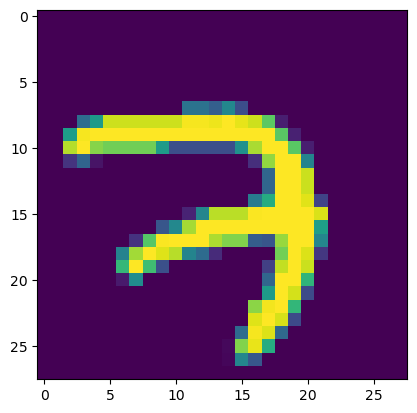

In [30]:
plt.imshow(x_train[0])

In [38]:

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))  
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])


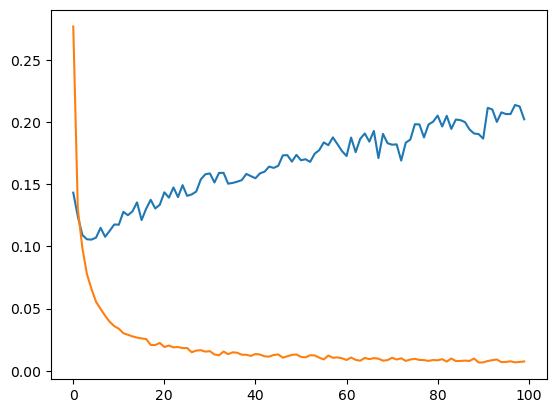

In [40]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])

In [41]:

model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(BatchNormalization())
model1.add(Dense(128, activation='relu')) 
model1.add(BatchNormalization())
model1.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [43]:
history1 = model1.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1375/1375 [==============================] - 7s 4ms/step - loss: 0.2711 - accuracy: 0.9192 - val_loss: 0.1537 - val_accuracy: 0.9558
Epoch 2/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.1316 - accuracy: 0.9606 - val_loss: 0.1178 - val_accuracy: 0.9670
Epoch 3/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0974 - accuracy: 0.9704 - val_loss: 0.1125 - val_accuracy: 0.9680
Epoch 4/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0790 - accuracy: 0.9755 - val_loss: 0.1117 - val_accuracy: 0.9698
Epoch 5/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.1135 - val_accuracy: 0.9684
Epoch 6/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0545 - accuracy: 0.9828 - val_loss: 0.1167 - val_accuracy: 0.9715
Epoch 7/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.1143 - val_accuracy:

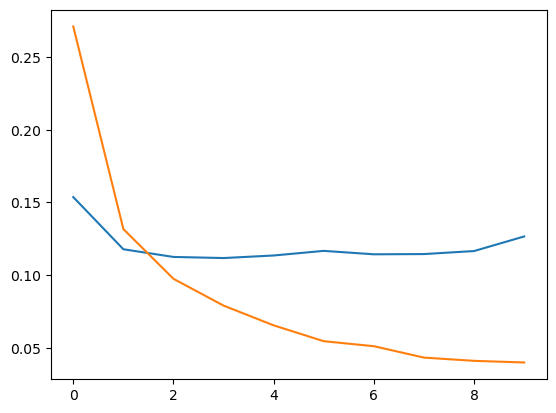

In [48]:
plt.plot(history1.history["val_loss"],)
plt.plot(history1.history["loss"])

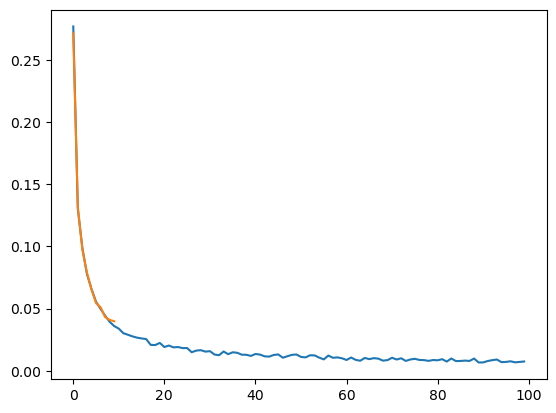

In [52]:
plt.plot(history.history["loss"])
plt.plot(history1.history["loss"])


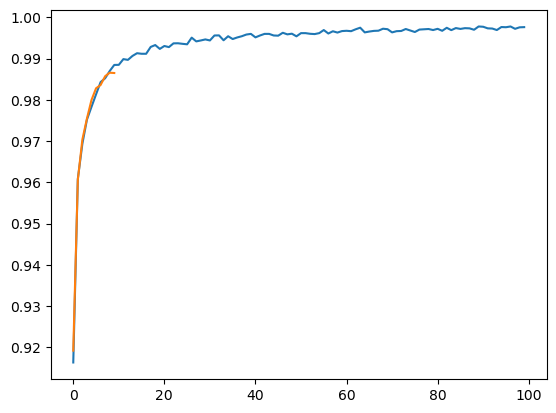

In [53]:
plt.plot(history.history["accuracy"])
plt.plot(history1.history["accuracy"])

In [55]:
x_train.shape

(55000, 28, 28)

In [63]:
history2 = model1.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=100)
history3 = model1.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=100)
history4 = model1.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=100)

Epoch 1/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.1109 - val_accuracy: 0.9776
Epoch 2/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.1240 - val_accuracy: 0.9741
Epoch 3/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.1270 - val_accuracy: 0.9755
Epoch 4/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1220 - val_accuracy: 0.9749
Epoch 5/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.1217 - val_accuracy: 0.9771
Epoch 6/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.1280 - val_accuracy: 0.9761
Epoch 7/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.1263 - val_accuracy: 0.9758
Epoch 

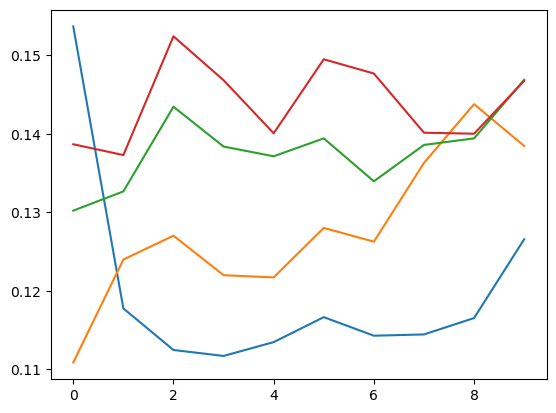

In [66]:

plt.plot(history1.history["val_loss"])
plt.plot(history2.history["val_loss"])
plt.plot(history3.history["val_loss"])
plt.plot(history4.history["val_loss"])


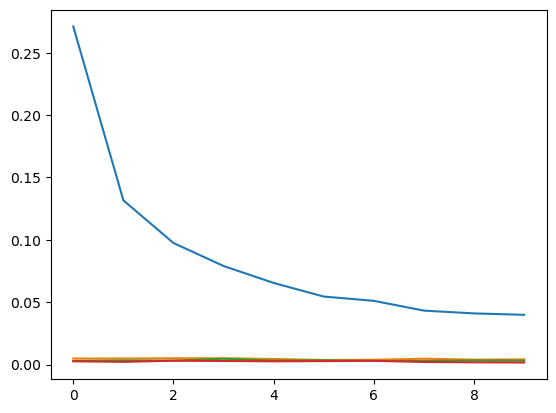

In [67]:
plt.plot(history1.history["loss"])
plt.plot(history2.history["loss"])
plt.plot(history3.history["loss"])
plt.plot(history4.history["loss"])

# Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

Advantages of Batch Normalization:

Stabilizes Training:

Batch Normalization helps in stabilizing and accelerating the training process. It reduces internal covariate shift, allowing for more stable and faster convergence during training.
Reduces Sensitivity to Initialization:

Neural networks are sensitive to weight initialization. Batch Normalization reduces this sensitivity, making it easier to initialize weights in a way that facilitates learning.
Allows Higher Learning Rates:

With Batch Normalization, higher learning rates can be used without the risk of divergence. This can lead to faster convergence and shorter training times.
Mitigates Vanishing and Exploding Gradients:

Batch Normalization helps mitigate the vanishing and exploding gradient problems by normalizing the inputs at each layer. This enables the training of deeper networks.
Acts as a Regularization Technique:

Batch Normalization has a slight regularizing effect, reducing the need for other regularization techniques like dropout. This can help prevent overfitting.
Improves Generalization:

The normalization process can lead to improved generalization on unseen data, as it reduces internal covariate shift and helps the model learn more robust features.
Limitations and Considerations:

Increased Computational Cost:

Batch Normalization introduces additional computations during both training and inference. While modern hardware accelerates these computations, it's still an important consideration, especially in resource-constrained environments.
Batch Size Dependency:

The effectiveness of Batch Normalization is influenced by the choice of batch size. In some cases, very small batch sizes or batch sizes of 1 may not work well with Batch Normalization.
Not Always Beneficial in Recurrent Networks:

Batch Normalization may not always provide benefits in recurrent neural networks (RNNs) or networks with dynamic architectures. The temporal dependencies in sequences can be disrupted by the normalization process.
Makes Training Data-Dependent:

Batch Normalization relies on statistics computed from the current mini-batch during training. This makes the training process data-dependent and may not work well in non-stationary environments or with small datasets.
Not Compatible with Certain Architectures:

Batch Normalization may not be well-suited for certain architectures, such as generative adversarial networks (GANs) or networks with non-standard activation functions.
Internal Covariate Shift May Not Always Be the Main Issue:

While Batch Normalization is designed to address internal covariate shift, in some cases, it may not be the primary issue affecting training, and its benefits may be less pronounced.